---
title: Borzoi test predictions on small gene set
author: Sabrina Mi
date: 9/21/2023
description: Rough template of scaled up Borzoi gene expression prediction
format:
  html:
    code-fold: true
execute:
  include: false
---

## Sample Genes

In [24]:
import pandas as pd
from scipy import stats
annot_df = pd.read_csv("/home/s1mi/enformer_rat_data/annotation/hg38.gene.txt", sep="\t")
gene_list = pd.read_csv("/home/s1mi/enformer_rat_data/output/hg38_borzoi_across_genes.csv", header=None)
gene_df = annot_df[~annot_df["ensembl_gene_id"].isin(gene_list[0])]
gene_df = annot_df.sample(n=1000).drop(columns=["external_gene_name", "transcription_start_site"])
gene_df.to_csv("gene_list.txt", header=False, index=False)

## Run Borzoi

```
module load conda
conda activate borzoi
cd /home/s1mi/Github/deep-learning-in-genomics/posts/2023-09-21-borzoi-reference-gene-expression-prediction-test
python borzoi_predict.py --gene_df gene_list.txt --tracks "17,18,19" 
```

## Plot Comparisons Across Genes

In [ ]:
#!cat gene_predictions.csv gene_predictions0.csv > /home/s1mi/enformer_rat_data/output/hg38_borzoi_across_genes.csv
output_df = pd.read_csv("/home/s1mi/enformer_rat_data/output/hg38_borzoi_across_genes.csv", header=None).dropna()

In [22]:
human_brain_gex = pd.read_csv("/home/s1mi/enformer_rat_data/output/hg38_predicted_vs_observed_expression_all_GTEx_brain_tissues.csv", index_col=0).dropna()
merged_df = output_df.merge(human_brain_gex, left_on=0, right_index=True)
merged_df = merged_df[[0, 4, "enformer", "cortex"]]
merged_df.columns=["gene", "borzoi", "enformer", "observed"]
merged_df

,gene,borzoi,enformer,observed
0,ENSG00000260286,6.873438e+02,0.005209,0.086014
1,ENSG00000162877,3.553310e+03,0.270328,0.128466
2,ENSG00000083845,9.018748e+06,18.964096,135.113922
3,ENSG00000143199,1.511829e+03,0.049658,0.256258
5,ENSG00000188522,8.282543e+04,0.083827,0.460673
...,...,...,...,...
998,ENSG00000198626,3.959017e+04,11.577308,8.737213
999,ENSG00000184206,8.352521e+03,0.002583,0.155200
1000,ENSG00000140043,3.883056e+04,5.710264,7.826176
1001,ENSG00000081248,3.480795e+03,0.021962,0.345895


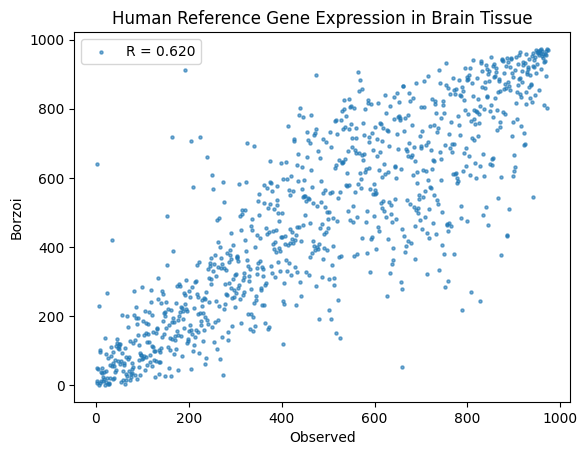

In [27]:
import matplotlib.pyplot as plt
x = merged_df["observed"]
y = merged_df["borzoi"]
corr, pval = stats.pearsonr(x, y)
plt.scatter(stats.rankdata(x), stats.rankdata(y), s=5, alpha=0.6, label=f'R = {corr:.3f}')
plt.xlabel('Observed')
plt.ylabel('Borzoi')
plt.title("Human Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

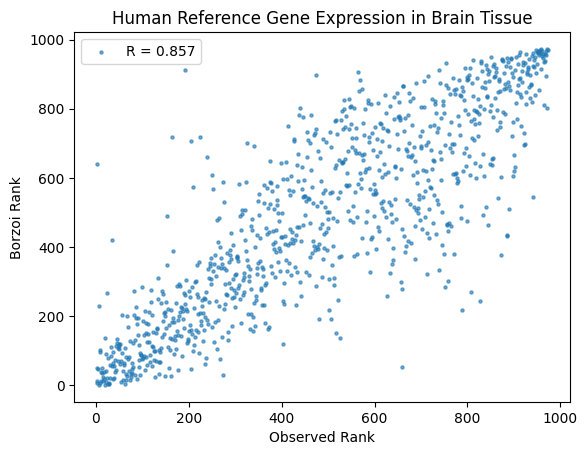

In [29]:
x = merged_df["observed"]
y = merged_df["borzoi"]
corr, pval = stats.spearmanr(x, y)
plt.scatter(stats.rankdata(x), stats.rankdata(y), s=5, alpha=0.6, label=f'R = {corr:.3f}')
plt.xlabel('Observed Rank')
plt.ylabel('Borzoi Rank')
plt.title("Human Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

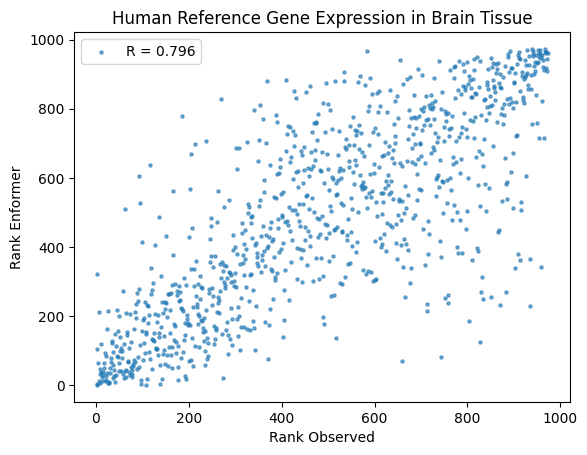

In [30]:
x = merged_df["observed"]
y = merged_df["enformer"]
corr, pval = stats.spearmanr(x, y)
plt.scatter(stats.rankdata(x), stats.rankdata(y), s=5, alpha=0.6, label=f'R = {corr:.3f}')
plt.xlabel('Rank Observed')
plt.ylabel('Rank Enformer')
plt.title("Human Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

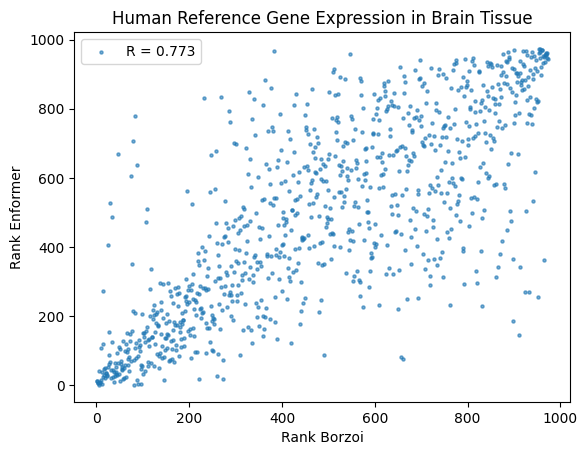

In [31]:
x = merged_df["borzoi"]
y = merged_df["enformer"]
corr, pval = stats.spearmanr(x, y)
plt.scatter(stats.rankdata(x), stats.rankdata(y), s=5, alpha=0.6, label=f'R = {corr:.3f}')
plt.xlabel('Rank Borzoi')
plt.ylabel('Rank Enformer')
plt.title("Human Reference Gene Expression in Brain Tissue")
plt.legend()
plt.show()

## Summary

In [35]:
print("Pearson R")
merged_df.corr(method="pearson")


Pearson R


/tmp/ipykernel_42770/1150790563.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr(method="pearson")


,borzoi,enformer,observed
borzoi,1.000000,0.225605,0.620217
enformer,0.225605,1.000000,0.593030
observed,0.620217,0.593030,1.000000


In [34]:
print("Spearman R")
merged_df.corr(method="spearman")


Spearman R


/tmp/ipykernel_42770/774805496.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr(method="spearman")


,borzoi,enformer,observed
borzoi,1.000000,0.773361,0.856641
enformer,0.773361,1.000000,0.795909
observed,0.856641,0.795909,1.000000
